In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sudoku-3m.csv')

In [59]:
df.describe()

,id,clues,difficulty
count,3.000000e+06,3.000000e+06,3.000000e+06
mean,1.500000e+06,2.430547e+01,1.238623e+00
std,8.660255e+05,1.102716e+00,1.272755e+00
min,1.000000e+00,1.900000e+01,0.000000e+00
25%,7.500008e+05,2.400000e+01,0.000000e+00
50%,1.500000e+06,2.400000e+01,1.200000e+00
75%,2.250000e+06,2.500000e+01,2.200000e+00
max,3.000000e+06,3.100000e+01,8.500000e+00


In [60]:
# 先把id列去掉，再把puzzle中的.换成0，比如.4.1..............653.....1.8.9..74...24..91.... to 040100000000000000653000001080900740002400910000
df = df.drop('id', axis=1)
df['puzzle'] = df['puzzle'].apply(lambda x: x.replace('.', '0'))

In [61]:
# 根据difficulty, 应该是0-10，每个区间给我取出100个，做成一个子集
# 创建一个空的 DataFrame，用于存放结果
result_df = pd.DataFrame()

# 定义 difficulty 的区间（0到10，每步间隔1）
difficulty_bins = list(range(0, 11))
difficulty_labels = [i for i in range(len(difficulty_bins)-1)]

# 为了分区添加 difficulty 区间列
df['difficulty_range'] = pd.cut(df['difficulty'], bins=difficulty_bins, labels=difficulty_labels, include_lowest=True)

# 从每个区间提取1000个样本
for label in difficulty_labels:
    subset = df[df['difficulty_range'] == label]
    sampled_subset = subset.sample(n=1000, random_state=42) if len(subset) >= 1000 else subset
    result_df = pd.concat([result_df, sampled_subset], ignore_index=True)

# 保存结果到一个新的 CSV 文件
result_df.to_csv('sudoku.csv', index=False)

In [62]:
result_df.describe()

,clues,difficulty
count,7034.000000,7034.000000
mean,24.187376,3.414188
std,1.116111,2.085217
min,20.000000,0.000000
25%,23.000000,1.800000
50%,24.000000,3.400000
75%,25.000000,5.200000
max,29.000000,8.500000


Text(0, 0.5, 'Count')

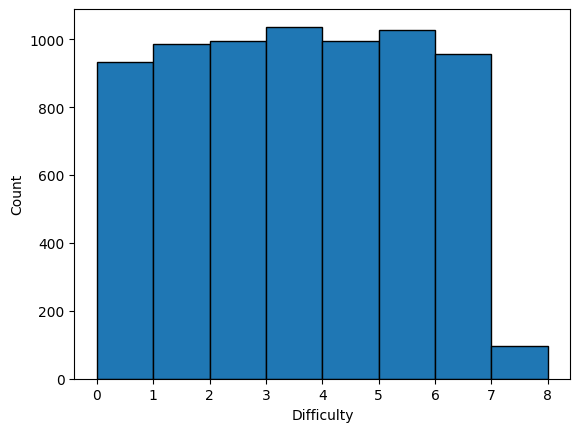

In [63]:
# 给我一个柱状图，是sudoku的难度分布
plt.hist(result_df['difficulty'], bins=range(0, 9), edgecolor='black')
# 很坐标纵坐标
plt.xlabel('Difficulty')
plt.ylabel('Count')


In [80]:
df.head()

,puzzle,solution,clues,difficulty,difficulty_range,result,time
0,0000700300000030200562000890000640010070000000...,4295781367186935243562417895327648918671592431...,24,1.0,0,4295781367186935243562417895327648918671592431...,0.620
1,4080765000000000400050008010047000020003200005...,4381765299215387467659428313847659121763294855...,25,0.0,0,4381765299215387467659428313847659121763294855...,0.191
2,0900000080206100000000056700000000600078000300...,7963421585286179434319856721524938679678512348...,24,0.0,0,7963421585286179434319856721524938679678512348...,2.219
3,0904005300420000908000000060080000075000730000...,1974265386423857918537192463689421575218734699...,26,0.0,0,1974265386423857918537192463689421575218734699...,2.384
4,9000010038402000095000080100006700004000103061...,9674518238412635795237986142386791454758123961...,25,0.0,0,9674518238412635795237986142386791454758123961...,1.225


In [66]:
#接下来统计每一个表格
cores = [1,2,4,8,16,32]
# 表格每周output{i}.csv
tables = [f"output{i}.csv" for i in cores]
tables
# 接下来统计每个表格不同difficulty用的平均时间，然后画在同一张表格上
# 横坐标是difficulty_range，纵坐标是平均耗时
# 不同的kernal数量的线用不同颜色来表达，准备好角标


['output1.csv',
 'output2.csv',
 'output4.csv',
 'output8.csv',
 'output16.csv',
 'output32.csv']

['output1.csv', 'output2.csv', 'output4.csv', 'output8.csv', 'output16.csv', 'output32.csv']


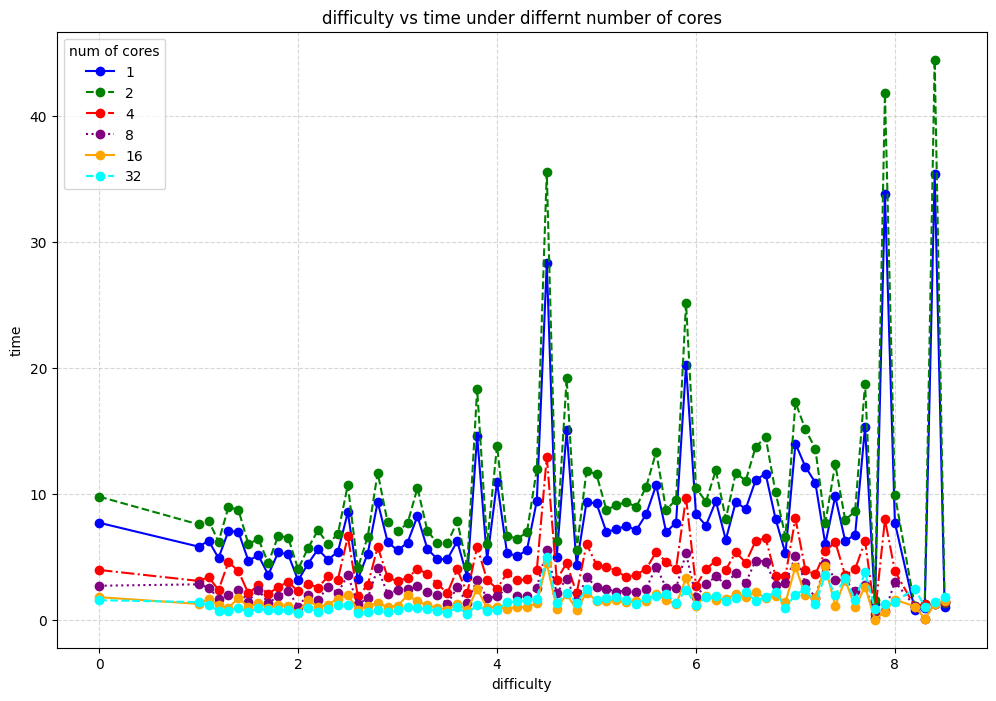

In [75]:


import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义核心数量
cores = [1, 2, 4, 8, 16, 32]

# 生成对应的 CSV 文件名列表
tables = [f"output{i}.csv" for i in cores]
print(tables)

# 创建一个字典来存储每个核心数量对应的平均耗时数据
average_times = {}

# 遍历每个 CSV 文件，计算不同难度下的平均耗时
for core, table in zip(cores, tables):
    if not os.path.exists(table):
        print(f"文件 {table} 不存在，请检查文件名和路径。")
        continue
    
    # 读取 CSV 文件
    df = pd.read_csv(table)
    
    # 假设 CSV 文件中有 'difficulty' 和 'time' 两列
    if 'difficulty' not in df.columns or 'time' not in df.columns:
        print(f"文件 {table} 中缺少 'difficulty' 或 'time' 列。")
        continue
    
    # 计算每个难度的平均耗时
    avg_time = df.groupby('difficulty')['time'].mean().reset_index()
    
    # 存储结果
    average_times[core] = avg_time

# 检查是否有有效的数据
if not average_times:
    print("hi")
    exit()

# 绘制图表
plt.figure(figsize=(12, 8))

# 定义颜色和线型，以便不同核心数量的线条区分开
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
line_styles = ['-', '--', '-.', ':', '-', '--']

for idx, (core, avg_time) in enumerate(average_times.items()):
    plt.plot(avg_time['difficulty'], avg_time['time'],
             label=f'{core}',
             color=colors[idx % len(colors)],
             linestyle=line_styles[idx % len(line_styles)],
             marker='o')

# 设置标题和标签
plt.title('difficulty vs time under differnt number of cores')
plt.xlabel('difficulty')
plt.ylabel('time')

# 添加网格
plt.grid(True, linestyle='--', alpha=0.5)

# 添加图例
plt.legend(title='num of cores')

# 显示图表
plt.show()


CSV 文件列表: ['output1.csv', 'output2.csv', 'output4.csv', 'output8.csv', 'output16.csv', 'output32.csv']
Speedup 表格已保存为 'speedup_comparison.csv'


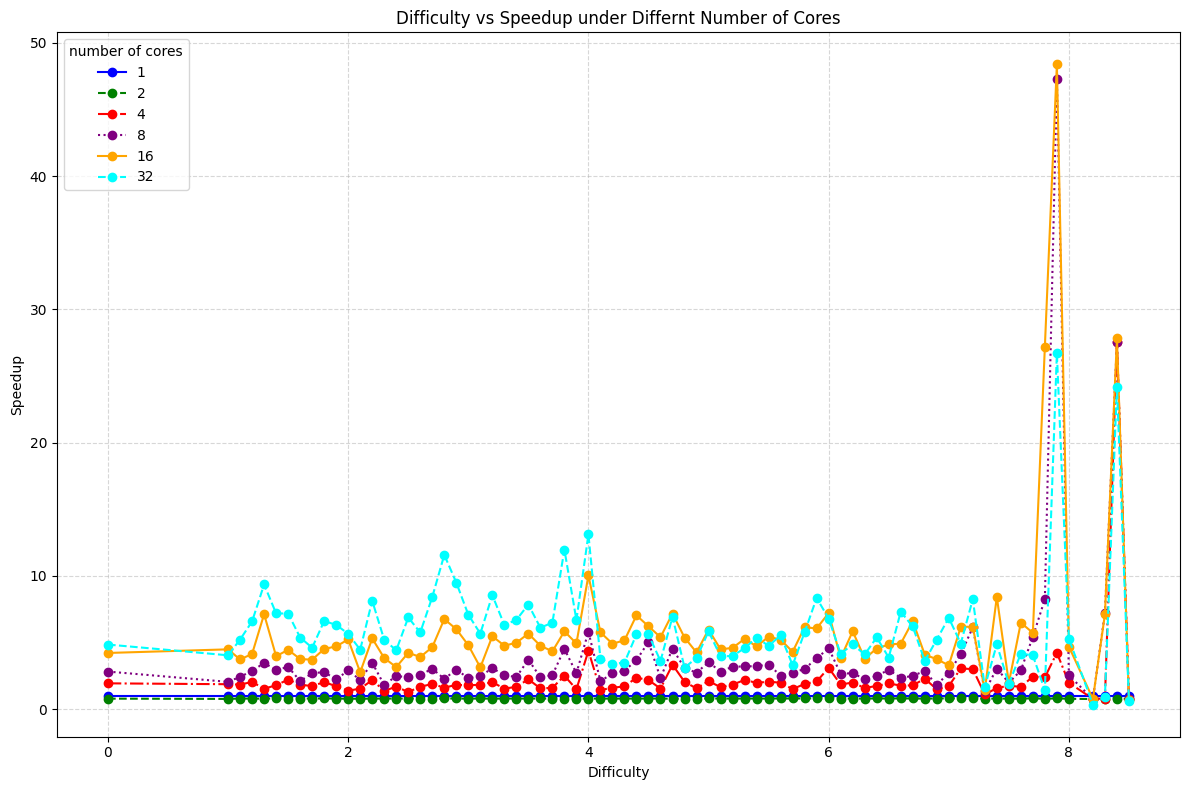

In [23]:
import pandas as pd
import os

# 定义核心数量
cores = [1, 2, 4, 8, 16, 32]

# 生成对应的 CSV 文件名列表
tables = [f"output{i}.csv" for i in cores]
print("CSV 文件列表:", tables)

# 创建一个字典来存储每个核心数量对应的平均耗时数据
average_times = {}

# 遍历每个 CSV 文件，计算不同难度下的平均耗时
for core, table in zip(cores, tables):
    if not os.path.exists(table):
        print(f"文件 {table} 不存在，请检查文件名和路径。")
        continue
    
    # 读取 CSV 文件
    df = pd.read_csv(table)
    
    # 假设 CSV 文件中有 'difficulty' 和 'time' 两列
    if 'difficulty' not in df.columns or 'time' not in df.columns:
        print(f"文件 {table} 中缺少 'difficulty' 或 'time' 列。")
        continue
    
    # 计算每个难度的平均耗时
    avg_time = df.groupby('difficulty')['time'].mean().reset_index()
    
    # 存储结果
    average_times[core] = avg_time

# 检查是否有有效的数据
if not average_times:
    print("没有有效的数据可以处理。")
    exit()

# 确保单核数据存在
if 1 not in average_times:
    print("单核（core1）的数据不存在，无法计算 Speedup。")
    exit()

# 提取单核的平均耗时数据，并设置 difficulty 为索引
core1_times = average_times[1].set_index('difficulty')['time']

# 创建一个 DataFrame 来存储 Speedup 数据
speedup_df = pd.DataFrame()
speedup_df['difficulty'] = core1_times.index
speedup_df.set_index('difficulty', inplace=True)

# 计算每个核心数量相对于单核的 Speedup
for core, avg_time in average_times.items():
    if core == 1:
        speedup_df[f'core{core}'] = 1.0  # 单核的 Speedup 为 1
    else:
        # 合并单核和当前核心的平均耗时数据
        merged = core1_times.to_frame(name='core1_time').join(avg_time.set_index('difficulty'), on='difficulty')
        
        # 计算 Speedup
        merged['speedup'] = merged['core1_time'] / merged['time']
        
        # 添加到 speedup_df
        speedup_df[f'core{core}'] = merged['speedup']

# 重置索引以便更好地展示
speedup_df.reset_index(inplace=True)

# 显示 Speedup 表格
# print("Speedup 表格：")
# print(speedup_df)

# save as latex
latex_code = speedup_df.to_latex(index=False, caption="Speedup Table", label="tab:speedup")
# print(latex_code)

with open('speedup.tex', 'w') as f:
    f.write(latex_code)


# 可选：保存 Speedup 表格为 CSV 文件
speedup_df.to_csv('speedup_comparison.csv', index=False)
print("Speedup 表格已保存为 'speedup_comparison.csv'")

plt.figure(figsize=(12, 8))

# 绘制每个核心数的效率曲线

# 定义颜色和线型，以便不同核心数量的线条区分开
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
line_styles = ['-', '--', '-.', ':', '-', '--']

for idx, core in enumerate(cores):
    speedup_column = f'core{core}'
    plt.plot(speedup_df['difficulty'], speedup_df[speedup_column], label=f'{core}', color=colors[idx % len(colors)], linestyle=line_styles[idx % len(line_styles)], marker='o')

# 设置标题和标签
plt.title('Difficulty vs Speedup under Differnt Number of Cores')
plt.xlabel('Difficulty')
plt.ylabel('Speedup')

# 添加网格
plt.grid(True, linestyle='--', alpha=0.5)

# 添加图例
plt.legend(title='number of cores')

# 优化布局
plt.tight_layout()

# 显示图表
plt.show()

# 可选：保存图表为图片文件
# plt.savefig('speed_comparison.png', dpi=300)



CSV 文件列表: ['output1.csv', 'output2.csv', 'output4.csv', 'output8.csv', 'output16.csv', 'output32.csv']
Efficiency 表格已保存为 'efficiency_comparison.csv'


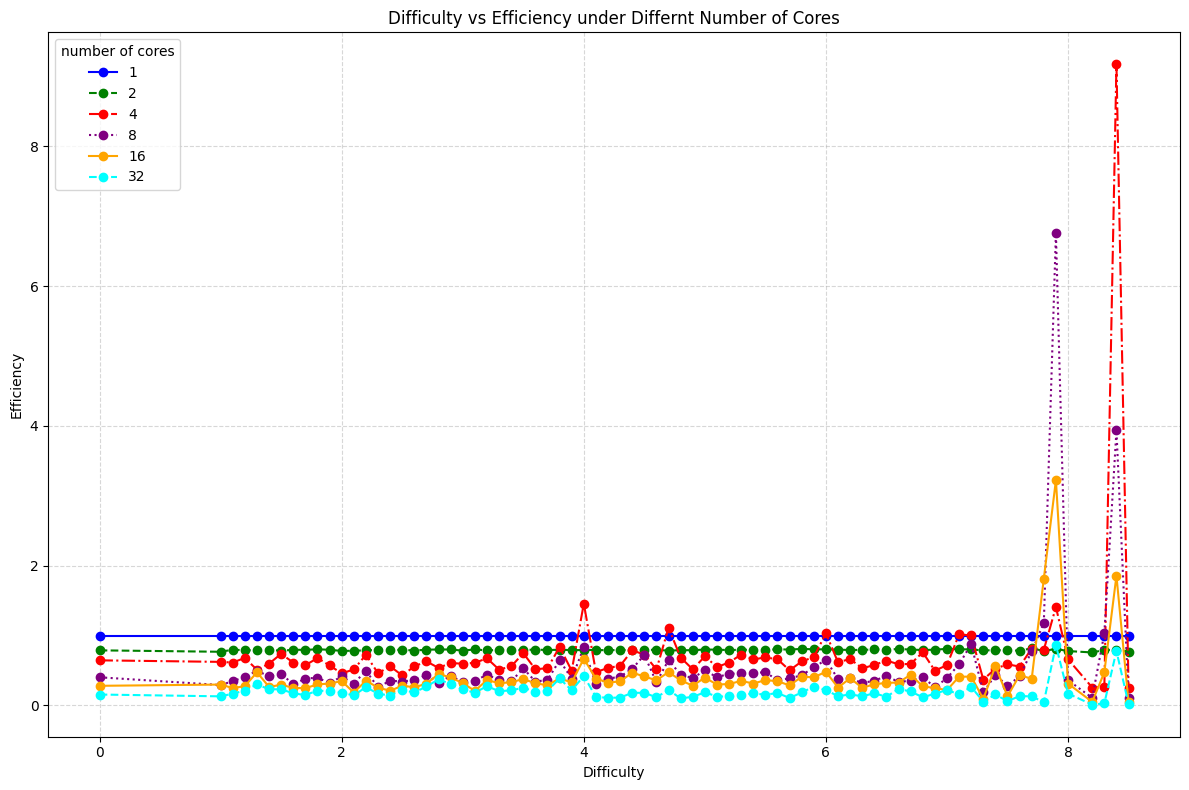

In [24]:
import pandas as pd
import os

# 定义核心数量
cores = [1, 2, 4, 8, 16, 32]

# 生成对应的 CSV 文件名列表
tables = [f"output{i}.csv" for i in cores]
print("CSV 文件列表:", tables)

# 创建一个字典来存储每个核心数量对应的平均耗时数据
average_times = {}

# 遍历每个 CSV 文件，计算不同难度下的平均耗时
for core, table in zip(cores, tables):
    if not os.path.exists(table):
        print(f"文件 {table} 不存在，请检查文件名和路径。")
        continue
    
    # 读取 CSV 文件
    df = pd.read_csv(table)
    
    # 假设 CSV 文件中有 'difficulty' 和 'time' 两列
    if 'difficulty' not in df.columns or 'time' not in df.columns:
        print(f"文件 {table} 中缺少 'difficulty' 或 'time' 列。")
        continue
    
    # 计算每个难度的平均耗时
    avg_time = df.groupby('difficulty')['time'].mean().reset_index()
    
    # 存储结果
    average_times[core] = avg_time

# 检查是否有有效的数据
if not average_times:
    print("没有有效的数据可以处理。")
    exit()

# 确保单核数据存在
if 1 not in average_times:
    print("单核（core1）的数据不存在，无法计算 Speedup。")
    exit()

# 提取单核的平均耗时数据，并设置 difficulty 为索引
core1_times = average_times[1].set_index('difficulty')['time']

# 创建一个 DataFrame 来存储 Speedup 数据
speedup_df = pd.DataFrame()
speedup_df['difficulty'] = core1_times.index
speedup_df.set_index('difficulty', inplace=True)

# 计算每个核心数量相对于单核的 Speedup
for core, avg_time in average_times.items():
    if core == 1:
        speedup_df[f'core{core}'] = 1.0  # 单核的 Speedup 为 1
    else:
        # 合并单核和当前核心的平均耗时数据
        merged = core1_times.to_frame(name='core1_time').join(avg_time.set_index('difficulty'), on='difficulty')
        
        # 计算 Speedup
        merged['speedup'] = merged['core1_time'] / merged['time'] / (core-1)
        
        # 添加到 speedup_df
        speedup_df[f'core{core}'] = merged['speedup']

# 重置索引以便更好地展示
speedup_df.reset_index(inplace=True)

# 显示 Speedup 表格
# print("Efficiency 表格：")
# print(speedup_df)

# 可选：保存 Speedup 表格为 CSV 文件
speedup_df.to_csv('efficency_comparison.csv', index=False)
print("Efficiency 表格已保存为 'efficiency_comparison.csv'")

# save as latex
latex_code = speedup_df.to_latex(index=False, caption="Efficency Table", label="tab:efficiency")
# print(latex_code)

with open('efficiency.tex', 'w') as f:
    f.write(latex_code)


plt.figure(figsize=(12, 8))

# 绘制每个核心数的效率曲线

# 定义颜色和线型，以便不同核心数量的线条区分开
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
line_styles = ['-', '--', '-.', ':', '-', '--']

for idx, core in enumerate(cores):
    speedup_column = f'core{core}'
    plt.plot(speedup_df['difficulty'], speedup_df[speedup_column], label=f'{core}', color=colors[idx % len(colors)], linestyle=line_styles[idx % len(line_styles)], marker='o')

# 设置标题和标签
plt.title('Difficulty vs Efficiency under Differnt Number of Cores')
plt.xlabel('Difficulty')
plt.ylabel('Efficiency')

# 添加网格
plt.grid(True, linestyle='--', alpha=0.5)

# 添加图例
plt.legend(title='number of cores')

# 优化布局
plt.tight_layout()

# 显示图表
plt.show()

# 可选：保存图表为图片文件
# plt.savefig('speed_comparison.png', dpi=300)

